# Visualizing the Gender Gap in College Degrees

[The Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). Here's a preview of the first few rows:

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often [in the news](https://www.google.com/search?hl=en&gl=us&tbm=nws&authuser=0&q=gender+gap+stem&oq=gender+gap+stem&gs_l=news) and [not everyone agrees](http://www.pbs.org/newshour/making-sense/truth-women-stem-careers/) that there is a gap.

Let's take a look at the data and plot it out so we can visualize what, if any, gaps exists across the 17 categories of degrees. 

## Plotting Out the Data

First we're going to assign two RGB decimal codes to two separate variables. These codes are meant to display color-blind friendly shades of blue and orange. 

Then we'll make 3 separate lists of degree categories:

- STEM 
- Liberal Arts
- Other

We're doing this so we can easily call and plot out later on on a 6 by 3 matrix where each individual plot corresponds to an element in one of the lists. 

In [7]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

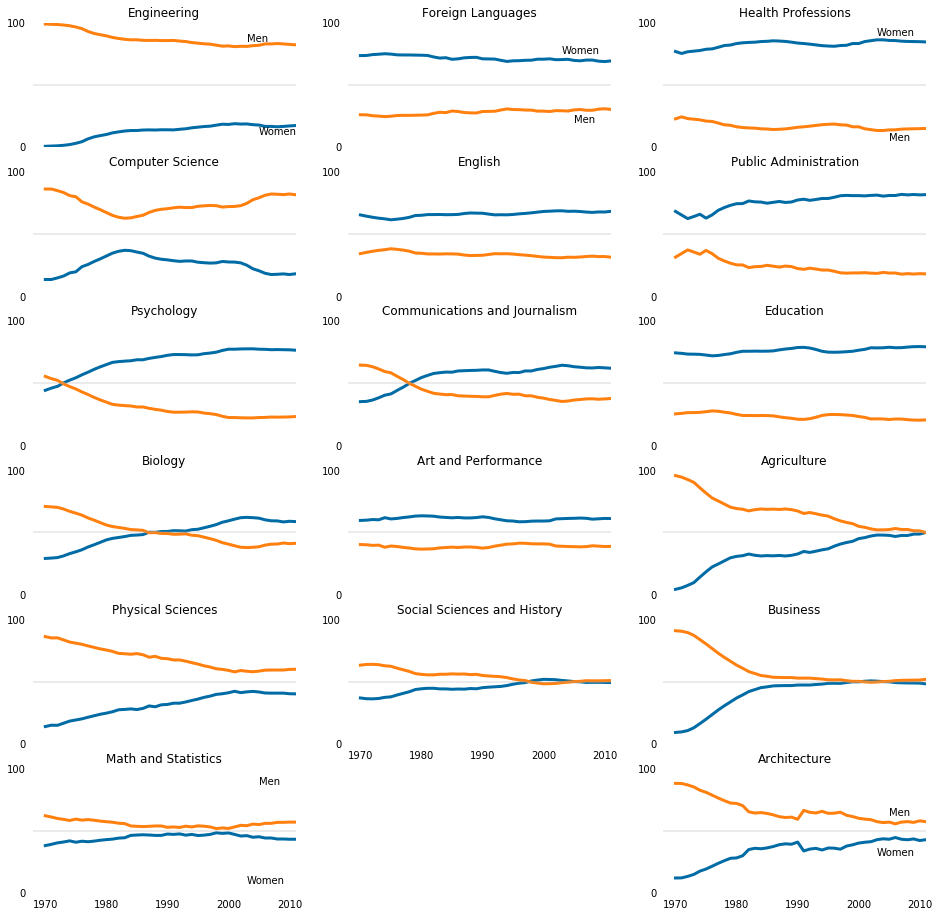

In [17]:

# Set backend to Agg.
fig = plt.figure(figsize=(16, 16))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_yticks([0,100])
    
    if cat_index == 0:
        ax.text(2003, 85, 'Men')
        ax.text(2005, 10, 'Women')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom=True)

## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_yticks([0,100])
    
    if cat_index == 0:
        ax.text(2003, 75, 'Women')
        ax.text(2005, 20, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom=True)

## Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_yticks([0,100])
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom=True)

# Export file before calling pyplot.show()
#fig.savefig("gender_degrees.png")
plt.show()

As we can see in the figures above, there definitely seems to be a significant and somewhat widening gap in the STEM fields between male and female graduates. In all but one field in STEM (Biology), male graduates outnumber their female counterparts. 

However, in 7 of the remaining 11 categories, women outnumber their male counterparts. In 4 categories outside of STEM where male graduates outnumber female graduates, the males barely cross 50% of total share. Indeed, the share of male and female graduates in these 4 categories are all roughly 50/50. 

While there is a considerable gap in the STEM fields, outside of STEM, women tend to overwhelmingly outpace or match the rate of male graduates. 